In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
%matplotlib inline

np.random.seed(42)

boston_data = load_boston() 
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names) 
target = boston_data.target

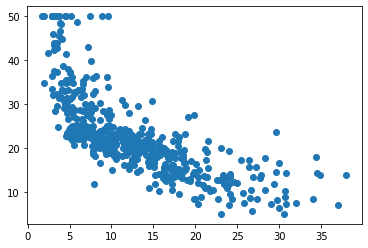

In [2]:
plt.scatter(boston_df['LSTAT'], target);

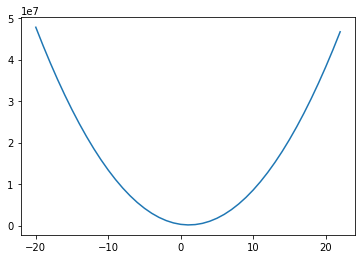

In [3]:
mses = []
lstat_coef = range(-20, 23)

for coef in lstat_coef:
    pred_values = np.array([coef * lstat for lstat in boston_df.LSTAT.values])
    mses.append(np.sum((target - pred_values)**2))
    
plt.plot(lstat_coef, mses);

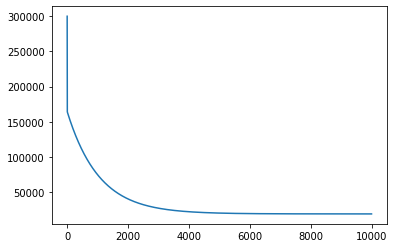

In [4]:
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
lstat_values = boston_df.LSTAT.values
n = len(lstat_values)
all_mse = []

for _ in range(10000):
    predicted = beta_0 + beta_1 * lstat_values
    residuals = target - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(lstat_values) * -1)
    
plt.plot(range(len(all_mse)), all_mse);

Beta 0: 34.27230357706076
Beta 1: -0.9331466362919295


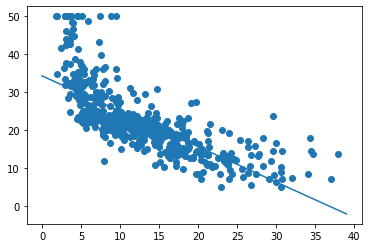

In [5]:
print(f"Beta 0: {beta_0}")
print(f"Beta 1: {beta_1}")
plt.scatter(boston_df['LSTAT'], target)
x = range(0, 40)
plt.plot(x, [beta_0 + beta_1 * l for l in x]);

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston_df) 
scaled_df = scaler.transform(boston_df)

In [7]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 4.685734304481881


In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly_df = poly.fit_transform(boston_df) 
scaled_poly_df = scaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")


linear_regression_model.fit(scaled_poly_df, target)
predictions = linear_regression_model.predict(scaled_poly_df) 
mse = mean_squared_error(target, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

shape: (506, 104)
RMSE: 3.243477309312183


In [9]:
linear_regression_model.fit(scaled_df, target) 
sorted(list(zip(boston_df.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

[('AGE', -0.029870864499927187),
 ('INDUS', -0.11680882000151187),
 ('CHAS', 0.7251651849373874),
 ('B', 0.8608332327515622),
 ('CRIM', -0.8776771165647124),
 ('ZN', 0.9642122737571698),
 ('TAX', -1.358984598705047),
 ('NOX', -1.9123308732835267),
 ('RAD', 1.9895291420964234),
 ('PTRATIO', -2.0358346398633964),
 ('RM', 2.750031226084554),
 ('DIS', -3.02764049950254),
 ('LSTAT', -3.7137758103897056)]

In [10]:
from sklearn.utils import resample

n_bootstraps = 1000 
bootstrap_X = [] 
bootstrap_y = [] 

for _ in range(n_bootstraps): 
    sample_X, sample_y = resample(scaled_df, target)
    bootstrap_X.append(sample_X) 
    bootstrap_y.append(sample_y)

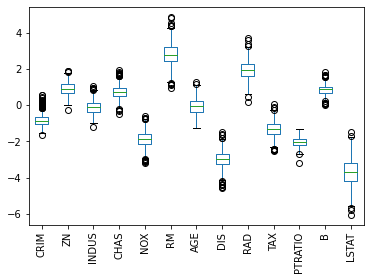

In [11]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = [] 

for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)
    
coef_df = pd.DataFrame(coeffs, columns=boston_df.columns) 
coef_df.plot(kind='box') 
plt.xticks(rotation=90);

count    1000.000000
mean       -3.681995
std         0.716037
min        -6.041889
25%        -4.158082
50%        -3.687054
75%        -3.184722
max        -1.493360
Name: LSTAT, dtype: float64


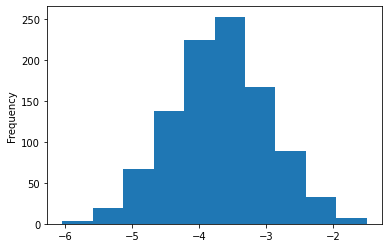

In [12]:
print(coef_df['LSTAT'].describe())
coef_df['LSTAT'].plot(kind='hist');

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, 
                                                    target, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 
linear_regression_model.fit(X_train, y_train)

train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 23.08582055024964
Test MSE: 21.352826257938506


c:\users\sunda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sunda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sunda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sunda\appdata\local\programs\python\python38\lib\site-package

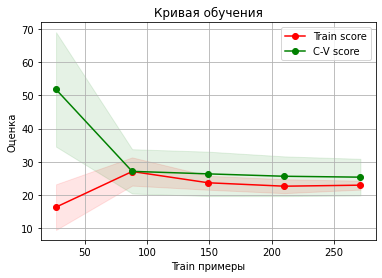

In [15]:
# Источник: http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train примеры")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(linear_regression_model, 
                    "Кривая обучения", 
                    X_train, 
                    y_train, 
                    cv=5);

In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]} 
linear_regression_model = SGDRegressor(tol=.0001) 
n_iter_search = 8 
random_search = RandomizedSearchCV(linear_regression_model, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search, 
                                   cv=3, 
                                   scoring='neg_mean_squared_error') 
random_search.fit(X_train, y_train) 

print("Лучшие параметры: {}".format(random_search.best_params_)) 
print("Лучшая оценка MSE: {}".format(random_search.best_score_))

Лучшие параметры: {'eta0': 0.01}
Лучшая оценка MSE: -25.550870878165046


c:\users\sunda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\sunda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [17]:
from sklearn.linear_model import ElasticNetCV

clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10]) 
clf.fit(X_train, y_train) 

train_predictions = clf.predict(X_train) 
test_predictions = clf.predict(X_test) 
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 23.58766002758097
Test MSE: 21.54591803491954
